In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow.keras import datasets, layers, models
import tensorflow.keras

import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import clear_output
import datetime

import pandas as pd
import numpy as np

from glob import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import os

In [10]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

## Tensorboard

In [11]:
import tensorflow as tf
import datetime
%reload_ext tensorboard

In [5]:
#%tensorboard --logdir "D:\\Masterarbeit\\Data\\logs\\fit\\" 

In [12]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

## Visualize predictions

In [13]:
from Model import make_KaI
from Data import image_generator

In [14]:
img_height = 128
img_width = 128
nclasses=2
filters=16
one_hot=2

KaI_50 = make_KaI(img_height, img_width, nclasses, filters, one_hot=one_hot, deep = False)
KaI_50.load_weights('D:/Masterarbeit/Data/weights/top_weights_200511_augment_50.ckpt')

KaI_10 = make_KaI(img_height, img_width, nclasses, filters, one_hot=one_hot, deep = False)
KaI_10.load_weights('D:/Masterarbeit/Data/weights/top_weights_200511_augment_10.ckpt')

KaI_20 = make_KaI(img_height, img_width, nclasses, filters, one_hot=one_hot, deep = False)
KaI_20.load_weights('D:/Masterarbeit/Data/weights/top_weights_200511_augment_20.ckpt')

KaI = make_KaI(img_height, img_width, nclasses, filters, one_hot=one_hot, deep = False)
KaI.load_weights('D:/Masterarbeit/Data/weights/top_weights_200511_blank.h5')

one_hot=1

KaI_cc = make_KaI(img_height, img_width, nclasses, filters, one_hot=one_hot, deep = True)
KaI_cc.load_weights('D:/Masterarbeit/Data/weights/top_weights_200511_blank_categorical_cross.h5')

KaI_dice = make_KaI(img_height, img_width, nclasses, filters, one_hot=one_hot, deep = True)
KaI_dice.load_weights('D:/Masterarbeit/Data/weights/top_weights_200511_blank_dice.h5')

In [9]:
img_height = 1000
img_width = 1000
nclasses=2
filters=16
one_hot=2
deep = False
zero_pad = 0

KaI_high_res_cat = make_KaI(img_height, img_width, nclasses, filters, one_hot, deep, zero_pad, channels = 1)
KaI_high_res_cat.load_weights('D:/Masterarbeit/Data/weights/top_weights_200511_high_categorical.h5')

img_height = 1000
img_width = 1000
nclasses=2
filters=16
one_hot=2
deep = True
zero_pad = 0

KaI_high_res_dice = make_KaI(img_height, img_width, nclasses, filters, one_hot, deep, zero_pad, channels = 1)
KaI_high_res_dice.load_weights('D:/Masterarbeit/Data/weights/top_weights_200511_high_res_custom_loss.h5')

In [15]:
files_mask_train = glob("D:\\Masterarbeit\\Data\\raw_terrain_data\\tf_data\\train\\WOKAM\\subfolder\\*")
files_img_train = glob("D:\\Masterarbeit\\Data\\raw_terrain_data\\tf_data\\train\\SRTM\\subfolder\\*")

files_mask_test = glob("D:\\Masterarbeit\\Data\\raw_terrain_data\\tf_data\\test\\WOKAM\\subfolder\\*")
files_img_test = glob("D:\\Masterarbeit\\Data\\raw_terrain_data\\tf_data\\test\\SRTM\\subfolder\\*")

train_generator = image_generator(files_img_train, files_mask_train, batch_size = 64, intensify =False, random = False, categorical = True)
test_generator = image_generator(files_img_test, files_mask_test, batch_size = 64, intensify = False , random = False, categorical = True)

train_generator_50 = image_generator(files_img_train, files_mask_train, batch_size = 64, intensify =50, random = False, categorical = True)
test_generator_50 = image_generator(files_img_test, files_mask_test, batch_size = 64, intensify = 50 , random = False, categorical = True)

train_generator_10 = image_generator(files_img_train, files_mask_train, batch_size = 64, intensify =10, random = False, categorical = True)
test_generator_10 = image_generator(files_img_test, files_mask_test, batch_size = 64, intensify = 10 , random = False, categorical = True)

train_generator_20 = image_generator(files_img_train, files_mask_train, batch_size = 64, intensify =20, random = False, categorical = True)
test_generator_20 = image_generator(files_img_test, files_mask_test, batch_size = 64, intensify = 20 , random = False, categorical = True)

train_generator_loss = image_generator(files_img_train, files_mask_train, batch_size = 64, intensify =False, random = False, categorical = False)
test_generator_loss = image_generator(files_img_test, files_mask_test, batch_size = 64, intensify = False , random = False, categorical = False)

In [16]:
with PdfPages("D:/Masterarbeit/Data/results/multi.pdf") as pdf:    
    
    for i in range(0,63):    

        x,y = next(test_generator)

        predictions = KaI.predict((x,y))
        preds = np.argmax(predictions, axis=-1)

        #x = x[i]
        y = y[i]

        x5,y5 = next(test_generator_50)

        predictions5 = KaI_50.predict((x5,y5))
        preds5 = np.argmax(predictions5, axis=-1)

        #x5 = x5[i]
        y5 = y5[i]

        x10,y10 = next(test_generator_10)

        predictions10 = KaI_10.predict((x10,y10))
        preds10 = np.argmax(predictions10, axis=-1)

        #x10 = x10[i]
        y10 = y10[i]

        x20,y20 = next(test_generator_20)

        predictions20 = KaI_20.predict((x20,y20))
        preds20 = np.argmax(predictions20, axis=-1)

        #x20 = x20[i]
        y20 = y20[i]

        fig, ((ax1, ax6, ax11, ax16),( ax2, ax7, ax12, ax17), (ax3, ax8, ax13, ax18), (ax4, ax9, ax14, ax19), (ax5, ax10, ax15, ax20)) = plt.subplots(ncols = 4,nrows = 5, figsize=(18,21),sharex="all", sharey="all",gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

        #fig, (ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20) = plt.subplots(4,5, figsize=(20,25))
        fig.suptitle('Input data split in 3 channels, expected output and predictions', x = 0.5, y = 0.93, fontsize=30)
                
        im1 = ax1.show(x[i,:,:,0].reshape(128,128), cmap = "Greys", interpolation= "gaussian")
        ax1.set_title('Raw data')
        im2 = ax2.show(x[i,:,:,1].reshape(128,128), cmap = "Greys", interpolation= "gaussian")
        im3 = ax3.show(x[i,:,:,2].reshape(128,128), cmap = "Greys", interpolation= "gaussian")

        im5 = ax4.imshow(np.argmax(y, axis=-1).reshape(1*128,128), cmap = "Greys", interpolation="gaussian")

        im5 = ax5.imshow(preds[i,:,:], cmap = "Greys")    

        im6 = ax6.imshow(x5[i,:,:,0].reshape(128,128), cmap = "Greys", interpolation= "gaussian")
        ax6.set_title('+ 5%')
        im7 = ax7.imshow(x5[i,:,:,1].reshape(128,128), cmap = "Greys", interpolation= "gaussian")
        im8 = ax8.imshow(x5[i,:,:,2].reshape(128,128), cmap = "Greys", interpolation= "gaussian")

        im9 = ax9.imshow(np.argmax(y5, axis=-1).reshape(1*128,128), cmap = "Greys", interpolation= "gaussian")


        im10 = ax10.imshow(preds5[i,:,:], cmap = "Greys", interpolation= "gaussian")        

        im11 = ax11.imshow(x10[i,:,:,0].reshape(128,128), cmap = "Greys", interpolation= "gaussian")
        ax11.set_title('+ 10%')
        im12 = ax12.imshow(x10[i,:,:,1].reshape(128,128), cmap = "Greys", interpolation= "gaussian")
        im13 = ax13.imshow(x10[i,:,:,2].reshape(128,128), cmap = "Greys", interpolation= "gaussian")

        im14 = ax14.imshow(np.argmax(y10, axis=-1).reshape(1*128,128), cmap = "Greys", interpolation="gaussian")


        im15 = ax15.imshow(preds10[i,:,:], cmap = "Greys", interpolation= "gaussian")   

        im16 = ax16.imshow(x20[i,:,:,0].reshape(128,128), cmap = "Greys", interpolation="gaussian")
        ax16.set_title('+ 20%')
        im17 = ax17.imshow(x20[i,:,:,1].reshape(128,128), cmap = "Greys", interpolation= "gaussian")
        im18 = ax18.imshow(x20[i,:,:,2].reshape(128,128), cmap = "Greys", interpolation= "gaussian")

        im19 = ax19.imshow(np.argmax(y20, axis=-1).reshape(1*128,128), cmap = "Greys", interpolation= "gaussian")

        im20 = ax20.imshow(preds20[i,:,:], cmap = "Greys", interpolation= "gaussian")    
        #fig.colorbar(im20,  orientation="horizontal",cax=axins20, ticks=[0, 0.5, 1])

        fig.subplots_adjust(bottom=0.06)

        cbar_ax = fig.add_axes([0.15, 0.01, 0.7, 0.02])
        fig.colorbar(im19, cax=cbar_ax,  orientation="horizontal")

        #maplegend = plt.pcolor(preds[i,:,:], cmap = "Greys")
        #plt.colorbar(maplegend, ax=axins,fraction=0.046, pad=0.04)

        #plt.show()
        
        pdf.savefig(fig, bbox_inches='tight')

UnidentifiedImageError: cannot identify image file <_io.BufferedReader name='D:\\Masterarbeit\\Data\\raw_terrain_data\\tf_data\\test\\SRTM\\subfolder\\tile10849.tif'>

In [15]:
with PdfPages("D:/Masterarbeit/Data/results/multi.pdf") as pdf:    
    
    for i in range(0,63):    

        x,y = next(test_generator)

        predictions = KaI.predict((x,y))
        preds = np.argmax(predictions, axis=-1)

        #x = x[i]
        y = y[i]

        x5,y5 = next(test_generator_50)

        predictions5 = KaI_50.predict((x5,y5))
        preds5 = np.argmax(predictions5, axis=-1)

        #x5 = x5[i]
        y5 = y5[i]

        x10,y10 = next(test_generator_10)

        predictions10 = KaI_10.predict((x10,y10))
        preds10 = np.argmax(predictions10, axis=-1)

        #x10 = x10[i]
        y10 = y10[i]

        x20,y20 = next(test_generator_20)

        predictions20 = KaI_20.predict((x20,y20))
        preds20 = np.argmax(predictions20, axis=-1)

        #x20 = x20[i]
        y20 = y20[i]

        fig, ((ax1, ax6, ax11, ax16),( ax2, ax7, ax12, ax17), (ax3, ax8, ax13, ax18), (ax4, ax9, ax14, ax19), (ax5, ax10, ax15, ax20)) = plt.subplots(ncols = 4,nrows = 5, figsize=(18,21),sharex="all", sharey="all",gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

        #fig, (ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20) = plt.subplots(4,5, figsize=(20,25))
        fig.suptitle('Input data split in 3 channels, expected output and predictions', x = 0.5, y = 0.93, fontsize=30)
                
        im1 = ax1.show(x[i,:,:,0].reshape(128,128), cmap = "Greys", interpolation= None)
        ax1.set_title('Raw data')
        im2 = ax2.show(x[i,:,:,1].reshape(128,128), cmap = "Greys", interpolation= None)
        im3 = ax3.show(x[i,:,:,2].reshape(128,128), cmap = "Greys", interpolation= None)

        im5 = ax4.imshow(np.argmax(y, axis=-1).reshape(1*128,128), cmap = "Greys", interpolation= None)

        im5 = ax5.imshow(preds[i,:,:], cmap = "Greys")    

        im6 = ax6.imshow(x5[i,:,:,0].reshape(128,128), cmap = "Greys", interpolation= None)
        ax6.set_title('+ 5%')
        im7 = ax7.imshow(x5[i,:,:,1].reshape(128,128), cmap = "Greys", interpolation= None)
        im8 = ax8.imshow(x5[i,:,:,2].reshape(128,128), cmap = "Greys", interpolation= None)

        im9 = ax9.imshow(np.argmax(y5, axis=-1).reshape(1*128,128), cmap = "Greys", interpolation= None)


        im10 = ax10.imshow(preds5[i,:,:], cmap = "Greys", interpolation= None)        

        im11 = ax11.imshow(x10[i,:,:,0].reshape(128,128), cmap = "Greys", interpolation= None)
        ax11.set_title('+ 10%')
        im12 = ax12.imshow(x10[i,:,:,1].reshape(128,128), cmap = "Greys", interpolation= None)
        im13 = ax13.imshow(x10[i,:,:,2].reshape(128,128), cmap = "Greys", interpolation= None)

        im14 = ax14.imshow(np.argmax(y10, axis=-1).reshape(1*128,128), cmap = "Greys", interpolation= None)


        im15 = ax15.imshow(preds10[i,:,:], cmap = "Greys", interpolation= None)   

        im16 = ax16.imshow(x20[i,:,:,0].reshape(128,128), cmap = "Greys", interpolation= None)
        ax16.set_title('+ 20%')
        im17 = ax17.imshow(x20[i,:,:,1].reshape(128,128), cmap = "Greys", interpolation= None)
        im18 = ax18.imshow(x20[i,:,:,2].reshape(128,128), cmap = "Greys", interpolation= None)

        im19 = ax19.imshow(np.argmax(y20, axis=-1).reshape(1*128,128), cmap = "Greys", interpolation= None)

        im20 = ax20.imshow(preds20[i,:,:], cmap = "Greys", interpolation= None)    
        #fig.colorbar(im20,  orientation="horizontal",cax=axins20, ticks=[0, 0.5, 1])

        fig.subplots_adjust(bottom=0.06)

        cbar_ax = fig.add_axes([0.15, 0.01, 0.7, 0.02])
        fig.colorbar(im19, cax=cbar_ax,  orientation="horizontal")

        #maplegend = plt.pcolor(preds[i,:,:], cmap = "Greys")
        #plt.colorbar(maplegend, ax=axins,fraction=0.046, pad=0.04)

        #plt.show()
        
        pdf.savefig(fig, bbox_inches='tight')

IndexError: too many indices for array

IndexError: index 1 is out of bounds for axis 2 with size 1

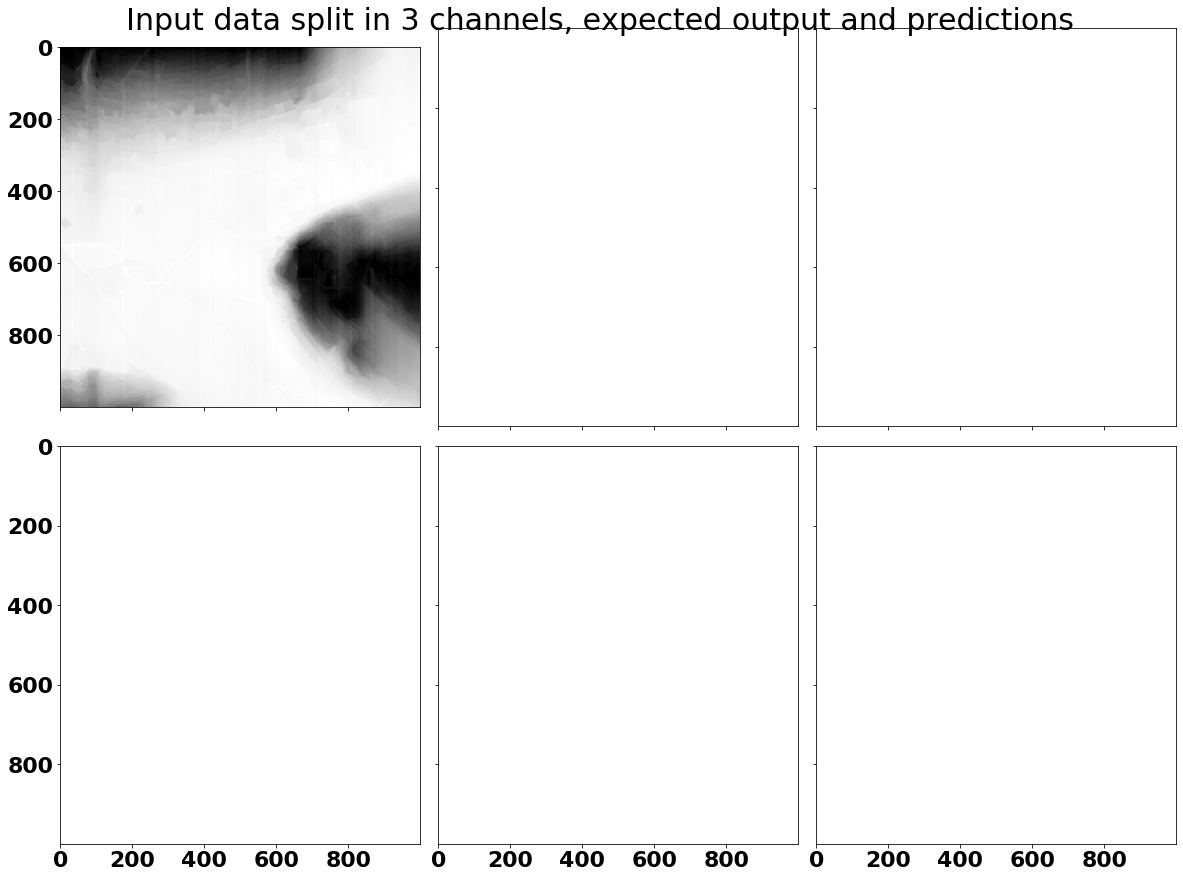

In [18]:
with PdfPages("D:/Masterarbeit/Data/results/multi_loss_functions_deep_2_col_test.pdf") as pdf:    
    
    for i in range(0,63):    

        x,y = next(test_generator_loss)

        predictions_cc = KaI_cc.predict((x,y))
        predictions_dice = KaI_dice.predict((x,y))
        
        x = x[i]
        y = y[i]

        fig, ((ax1, ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols = 3,nrows = 2, figsize=(20,15),sharex="all", sharey="all",gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

        #fig, (ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20) = plt.subplots(4,5, figsize=(20,25))
        fig.suptitle('Input data split in 3 channels, expected output and predictions', x = 0.5, y = 0.9, fontsize=30)
                
        im1 = ax1.imshow(x[:,:,0].reshape(128,128), cmap = "Greys")
        im2 = ax2.imshow(x[:,:,1].reshape(128,128), cmap = "Greys")
        im3 = ax3.imshow(x[:,:,2].reshape(128,128), cmap = "Greys")

        im4 = ax4.imshow(y.reshape(1*128,128), cmap = "Greys")

        im5 = ax5.imshow(predictions_cc[i,:,:,:].reshape(1*128,128), cmap = "Greys")
        ax5.set_title('categorical crossentropy')

        im6= ax6.imshow(predictions_dice[i,:,:,:].reshape(1*128,128), cmap = "Greys") 
        ax6.set_title('dice loss')

        fig.subplots_adjust(bottom=0.06)

        cbar_ax = fig.add_axes([0.15, 0.01, 0.7, 0.02])
        fig.colorbar(im10, cax=cbar_ax,  orientation="horizontal")

        #maplegend = plt.pcolor(preds[i,:,:], cmap = "Greys")
        #plt.colorbar(maplegend, ax=axins,fraction=0.046, pad=0.04)

        #plt.show()
        
        pdf.savefig(fig, bbox_inches='tight')

In [15]:
from Data import image_generator

files_mask_train = glob("D:\\Masterarbeit\\Data\\high_res\\slovenia_1m\\tf_data\\train\\WOKAM\\subfolder\\*")
files_img_train = glob("D:\\Masterarbeit\\Data\\high_res\\slovenia_1m\\tf_data\\train\\LIDAR\\subfolder\\*")

files_mask_test = glob("D:\\Masterarbeit\\Data\\high_res\\slovenia_1m\\tf_data\\test\\WOKAM\\subfolder\\*")
files_img_test = glob("D:\\Masterarbeit\\Data\\high_res\\slovenia_1m\\tf_data\\test\\LIDAR\\subfolder\\*")

train_generator_high_res = image_generator(files_img_train, files_mask_train, batch_size = 10, intensify = False, random = True, categorical =True, lidar = True)
test_generator_high_res = image_generator(files_img_test, files_mask_test, batch_size = 10, intensify = False, random = False, categorical = True, lidar = True)

train_generator_high_res_dice = image_generator(files_img_train, files_mask_train, batch_size = 10, intensify = False, random = True, categorical =True, lidar = True)
test_generator_high_res_dice = image_generator(files_img_test, files_mask_test, batch_size = 10, intensify = False, random = False, categorical = True, lidar = True)

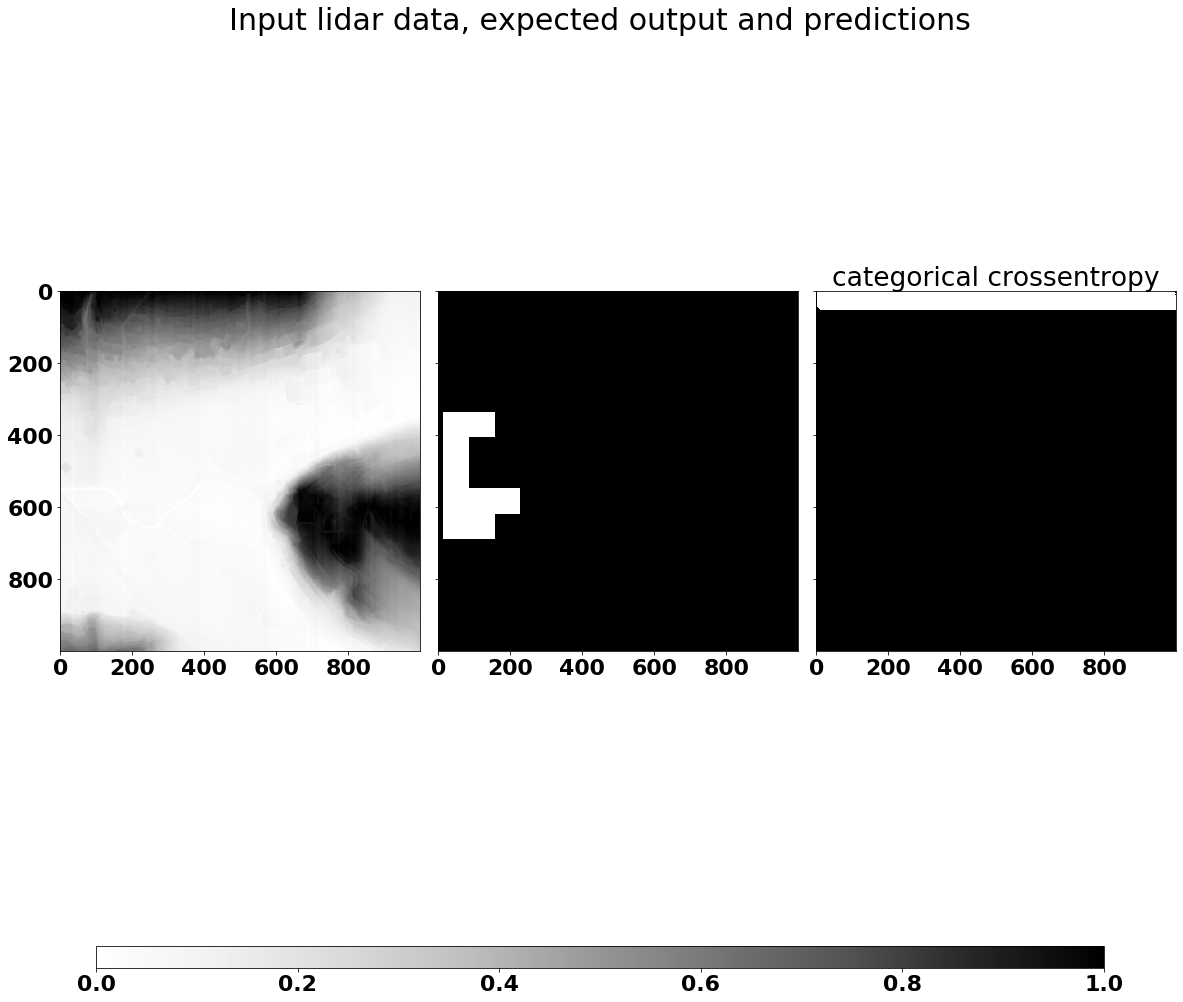

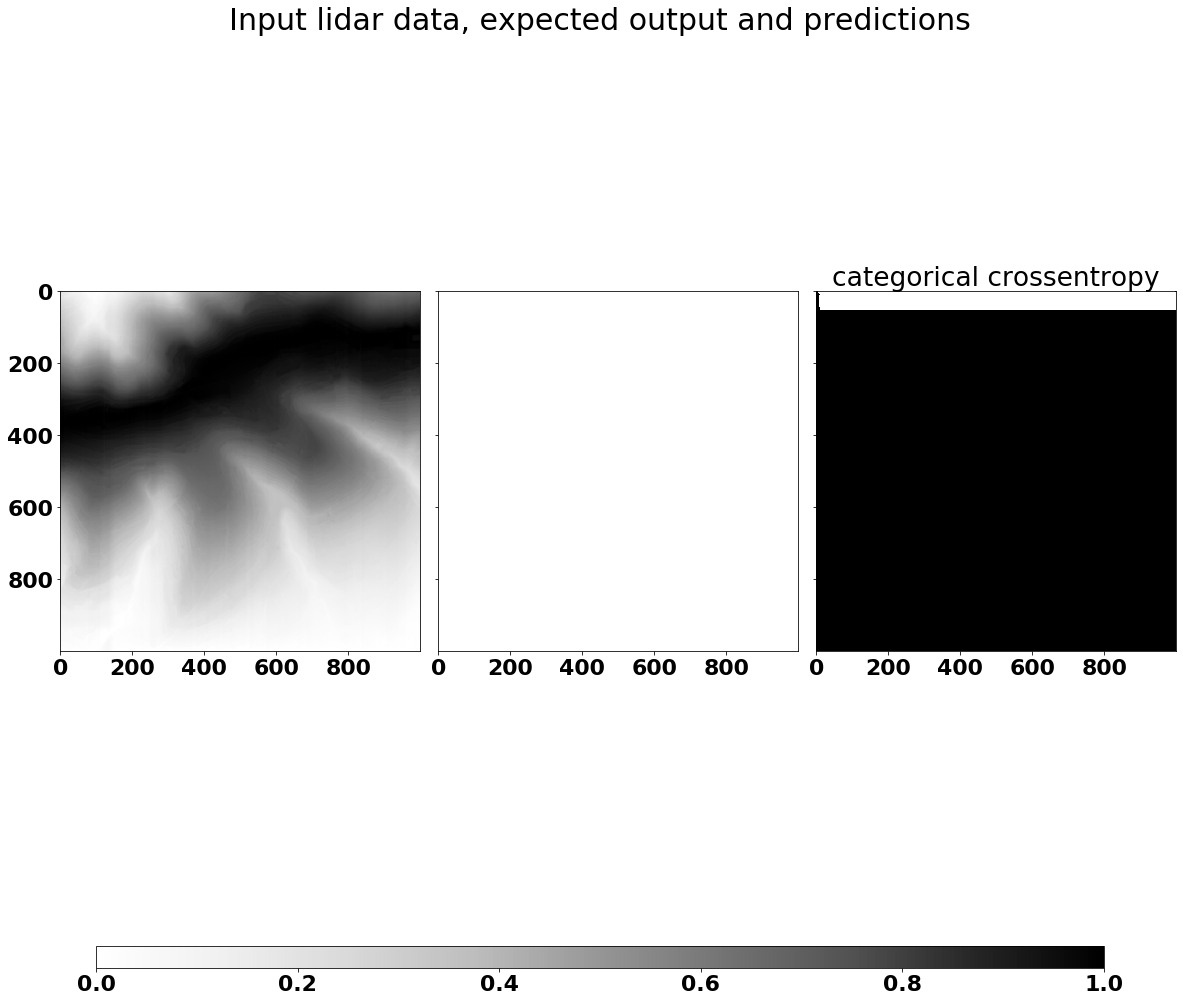

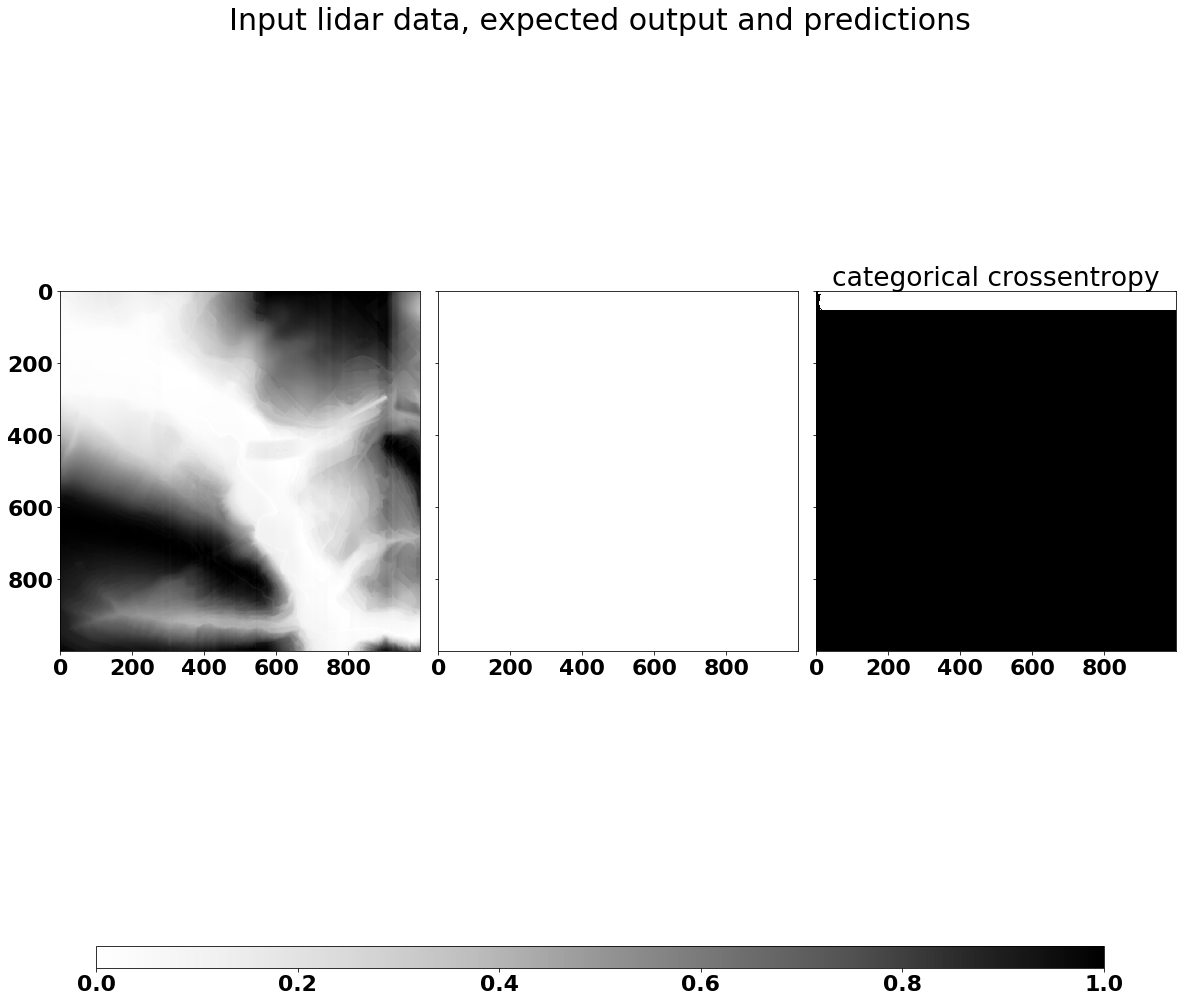

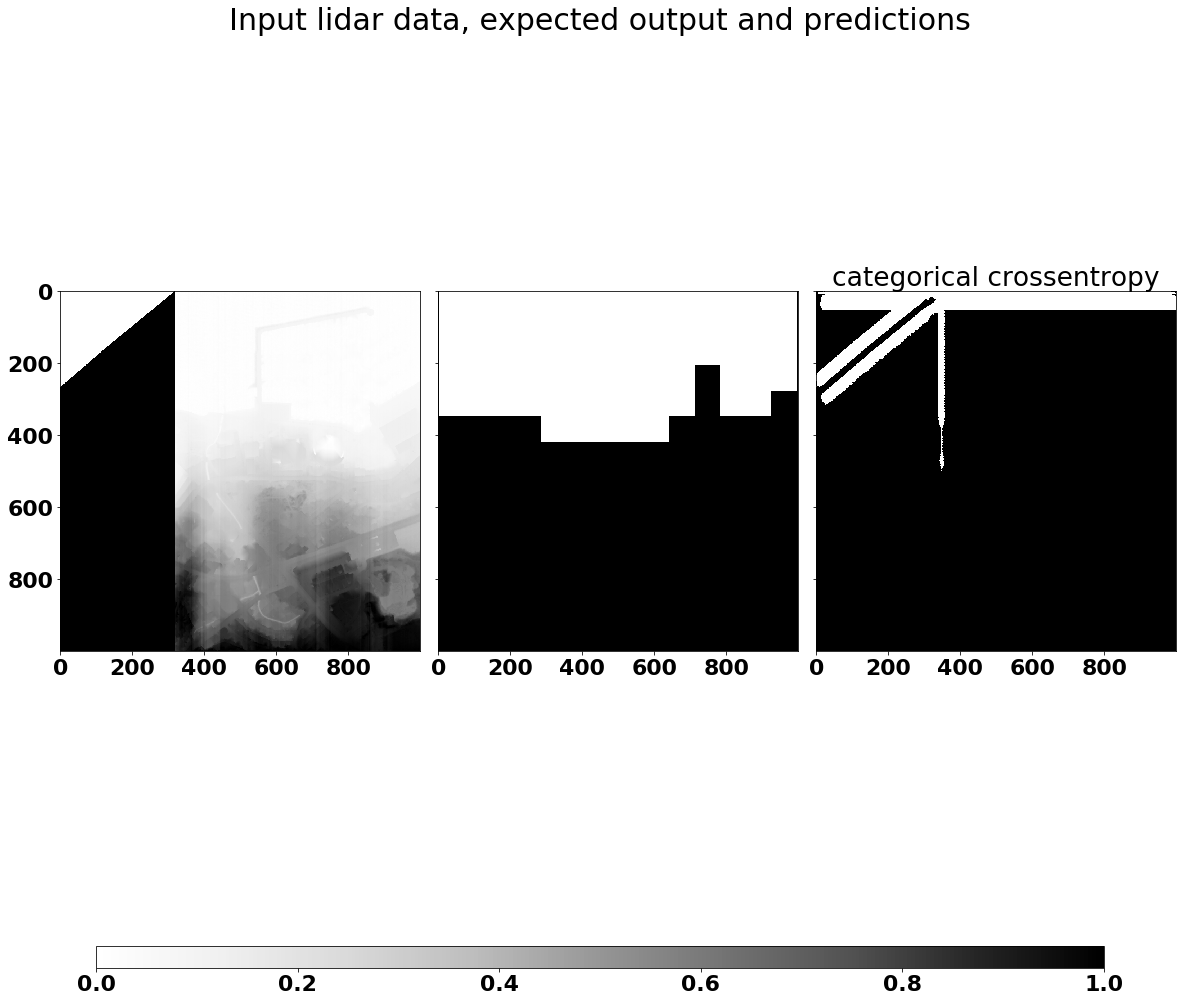

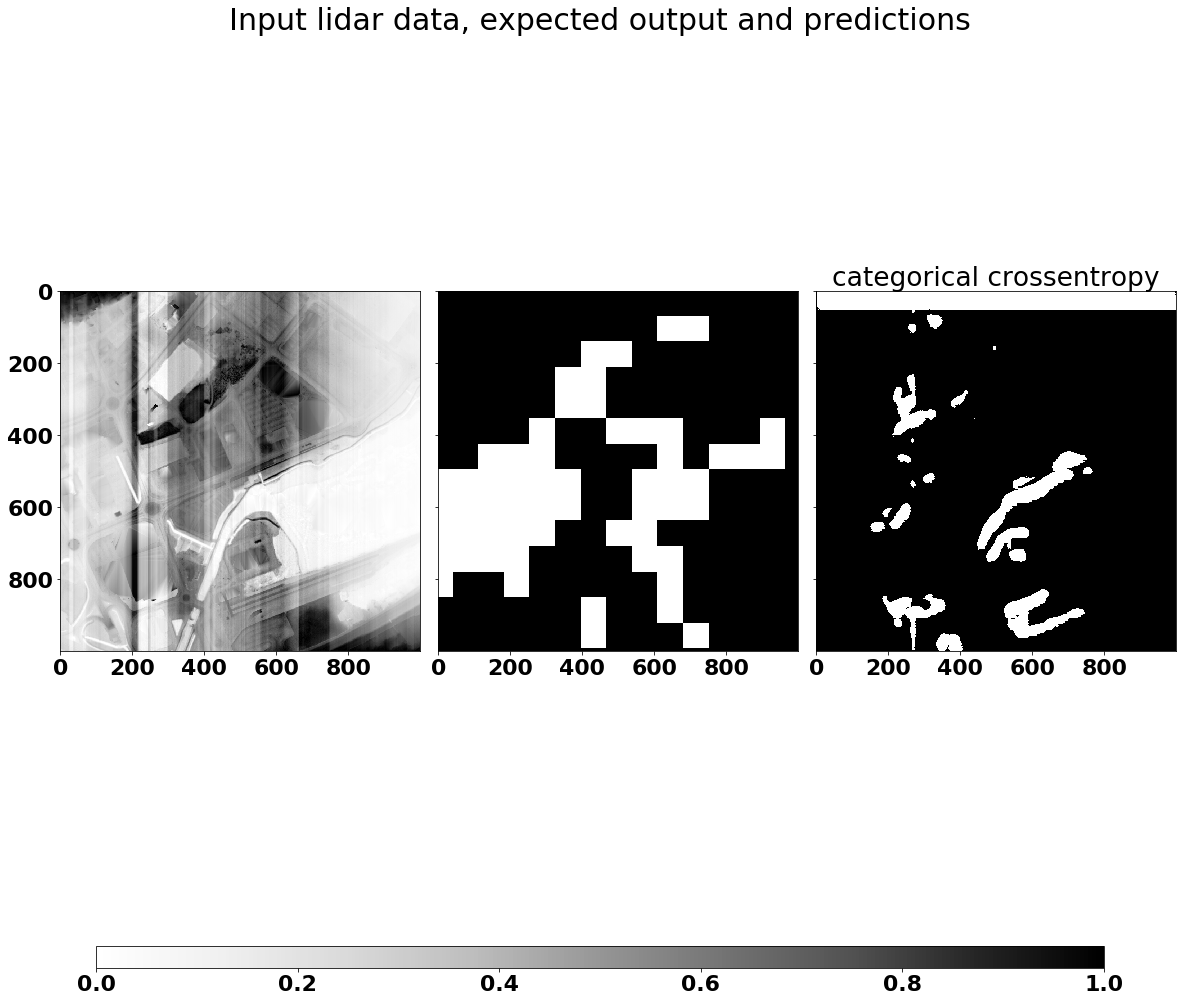

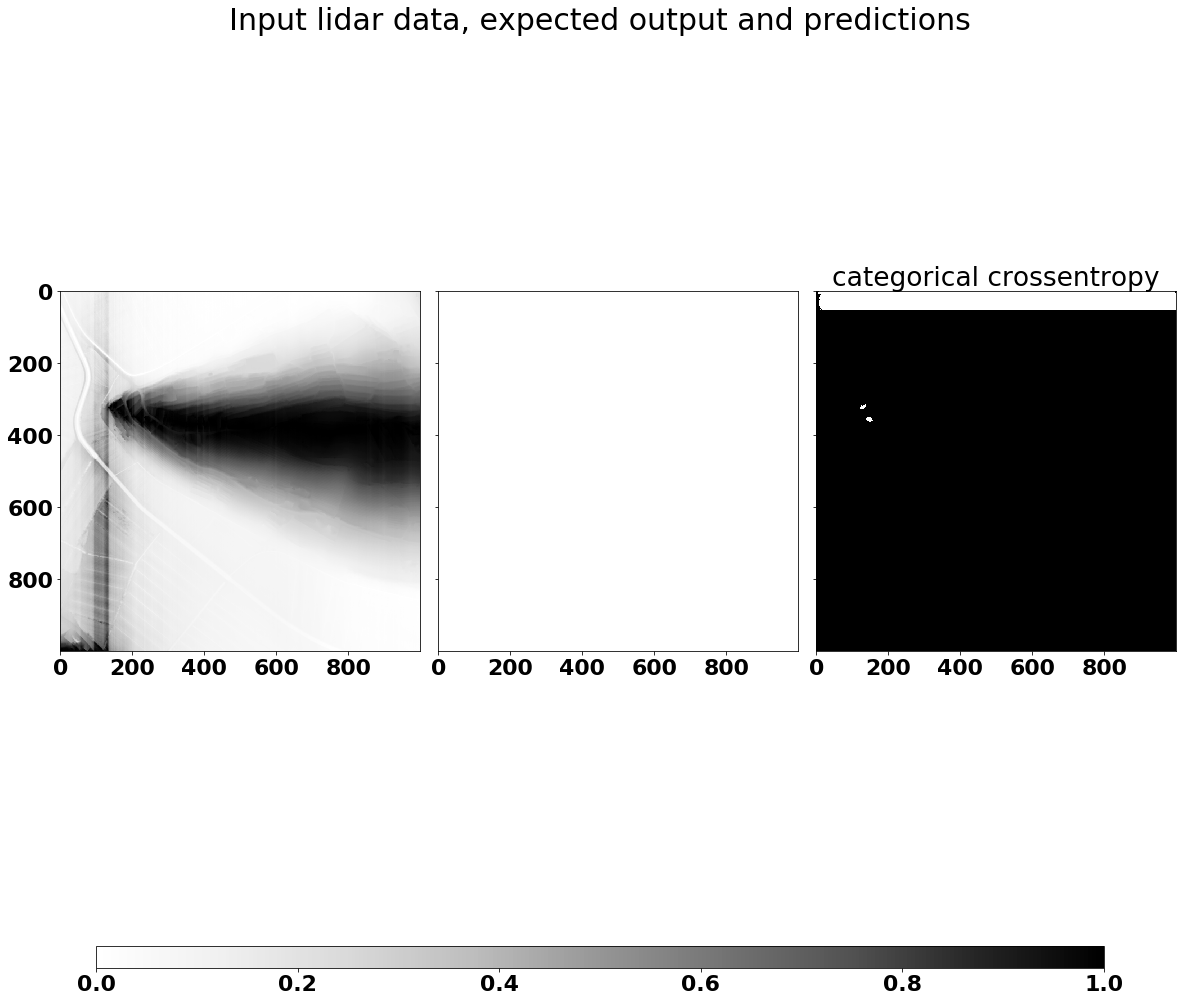

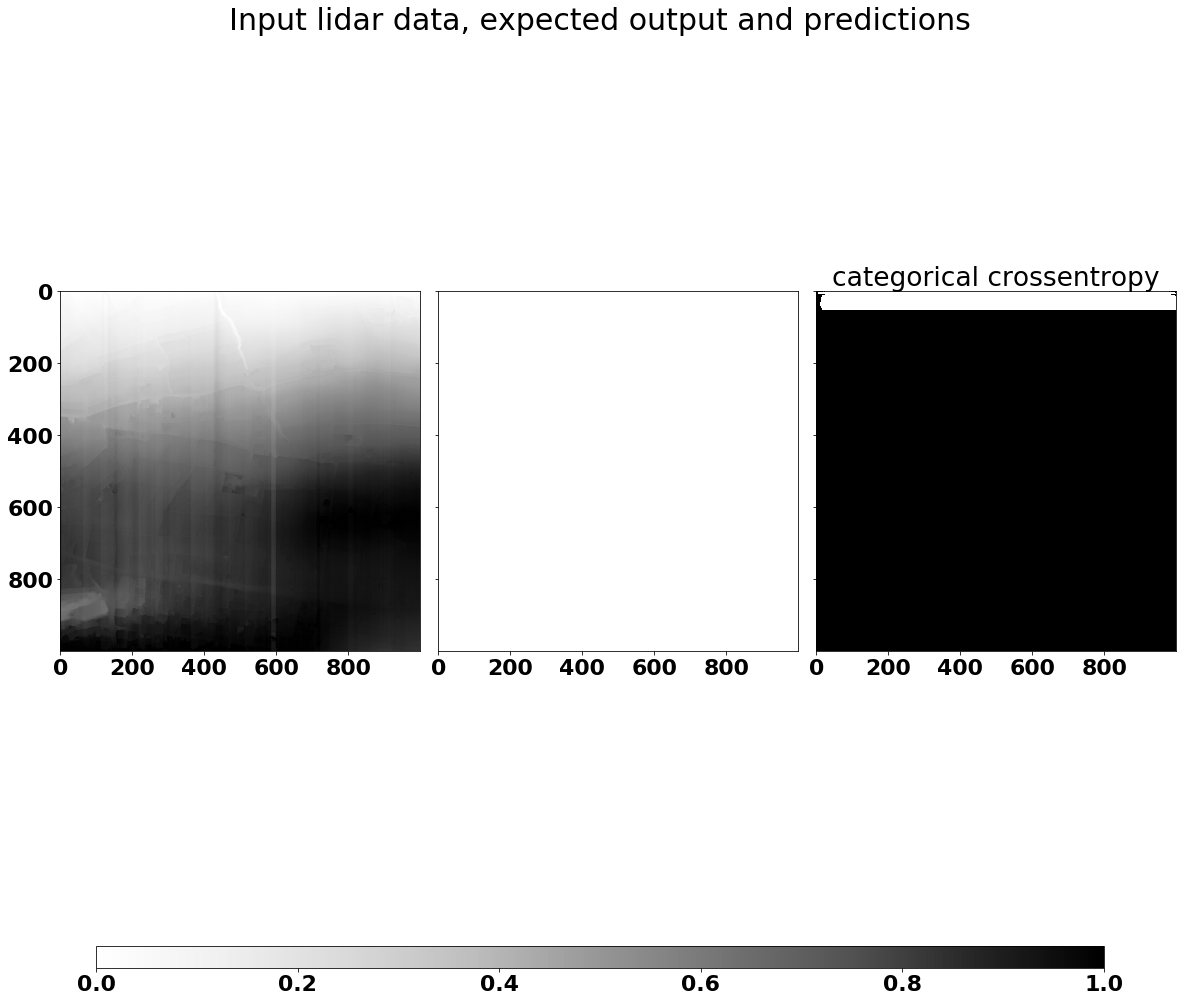

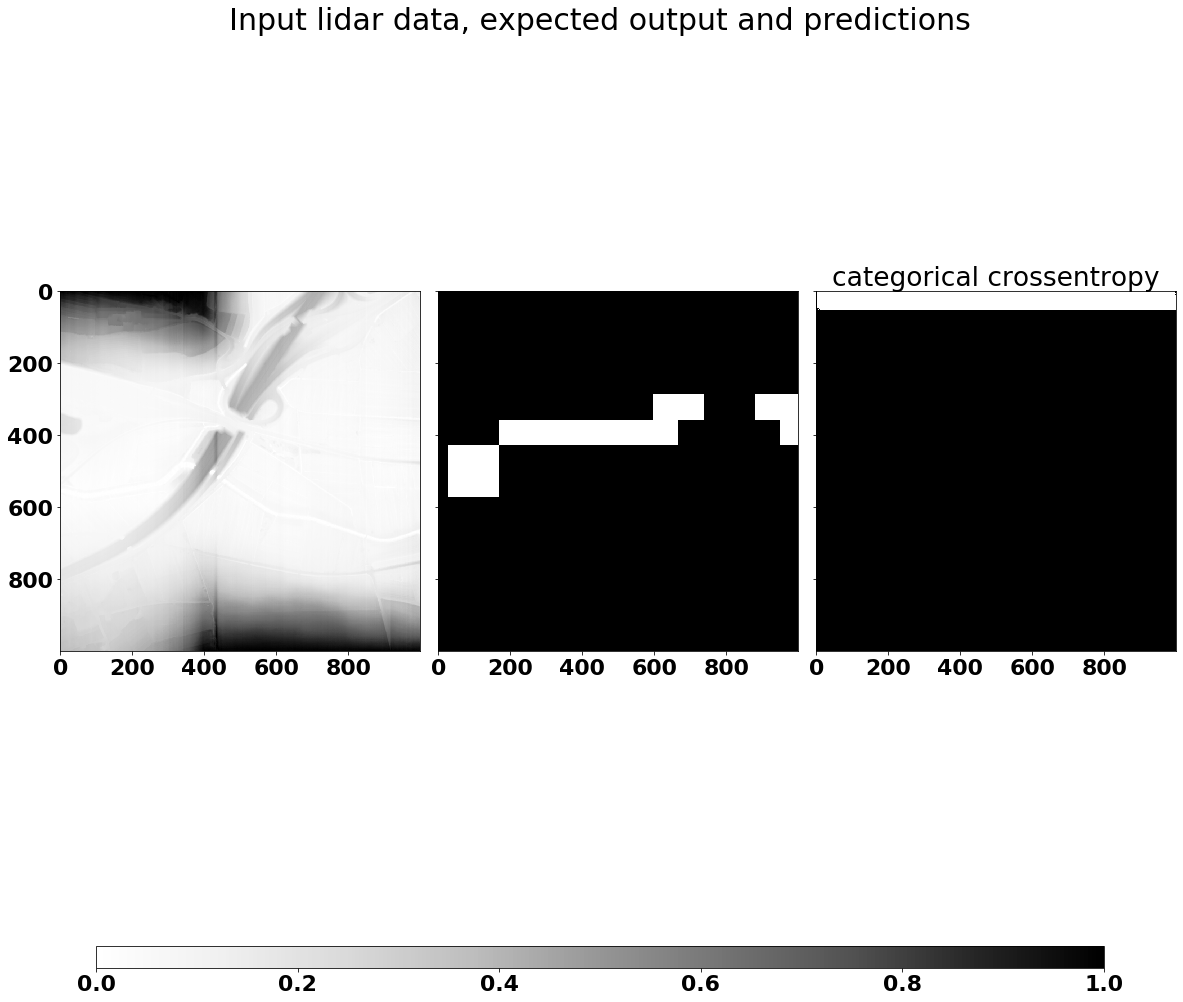

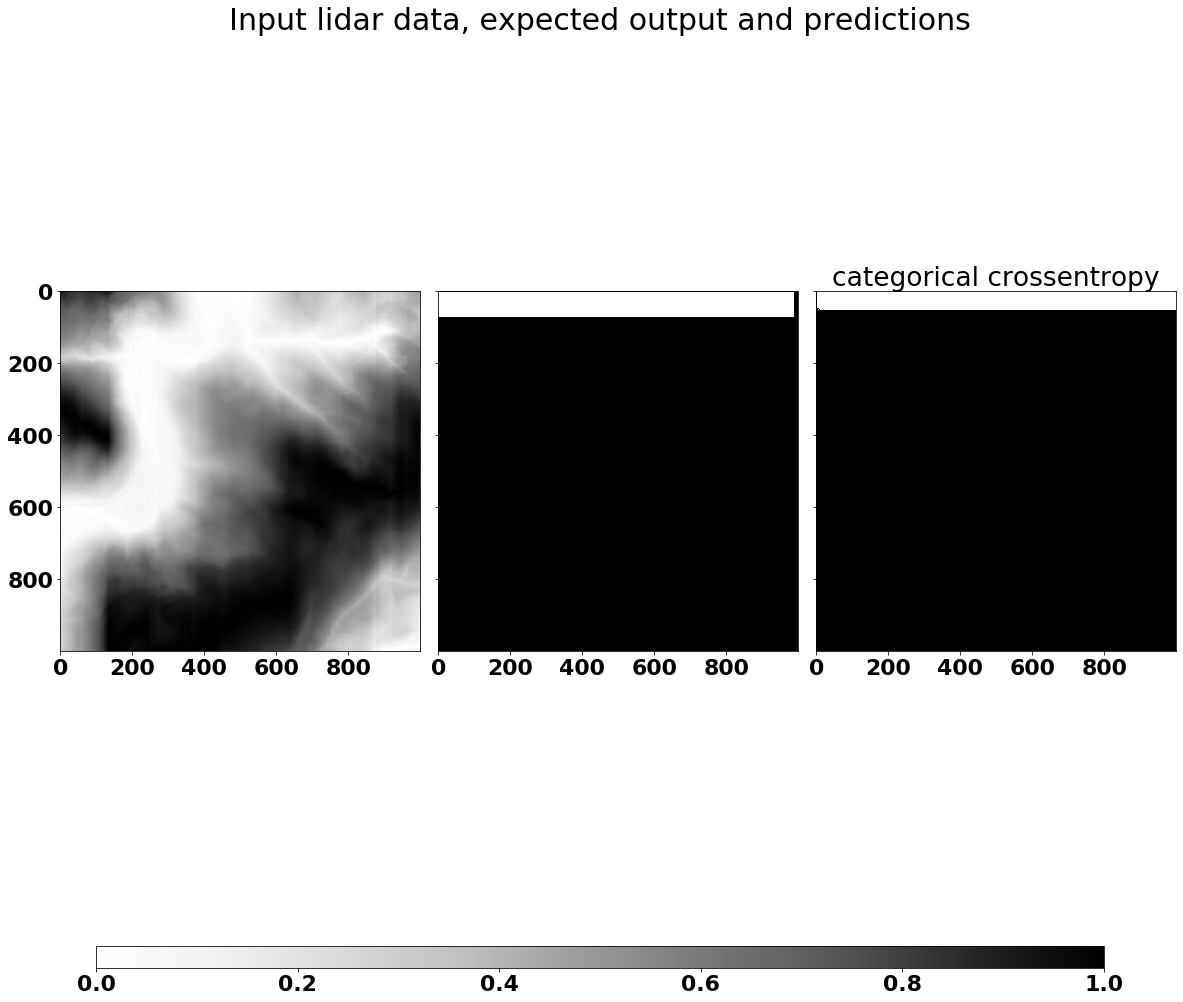

In [16]:
with PdfPages("D:/Masterarbeit/Data/results/high_res_test_dice.pdf") as pdf:    
    
    for i in range(0,9):    

        x,y = next(test_generator_high_res)

        predictions_cc = KaI_high_res_dice.predict((x,y))
        #predictions_cc = KaI_cc.predict((x,y))
        #predictions_dice = KaI_dice.predict((x,y))
        
        x = x[i]
        y = y[i]
        
        y = np.argmax(y, axis=-1)
        preds = np.argmax(predictions_cc, axis=-1)
        
        fig, ((ax1, ax2,ax3)) = plt.subplots(ncols = 3,nrows = 1, figsize=(20,15),sharex="all", sharey="all",gridspec_kw={'hspace': 0.05, 'wspace': 0.05})
        
        fig.suptitle('Input lidar data, expected output and predictions', x = 0.5, y = 0.9, fontsize=30)
                
        im1 = ax1.imshow(x[:,:,0].reshape(1000,1000), cmap = "Greys")
        #im2 = ax2.imshow(x[:,:,1].reshape(1000,1000), cmap = "Greys")
        #im3 = ax3.imshow(x[:,:,2].reshape(1000,1000), cmap = "Greys")

        im2 = ax2.imshow(y.reshape(1*1000,1000), cmap = "Greys")

        im2 = ax3.imshow(preds[i,:,:], cmap = "Greys")
        ax3.set_title('categorical crossentropy')

        #im6= ax6.imshow(predictions_dice[i,:,:,:].reshape(1*128,128), cmap = "Greys") 
        #ax6.set_title('dice loss')

        fig.subplots_adjust(bottom=0.06)

        cbar_ax = fig.add_axes([0.15, 0.01, 0.7, 0.02])
        fig.colorbar(im2, cax=cbar_ax,  orientation="horizontal")

        #maplegend = plt.pcolor(preds[i,:,:], cmap = "Greys")
        #plt.colorbar(maplegend, ax=axins,fraction=0.046, pad=0.04)

        #plt.show()
        
        pdf.savefig(fig, bbox_inches='tight')

In [124]:
layer_outputs = [layer.output for layer in KaI.layers[:4]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=KaI.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input